In [36]:
import os
import sys
import numpy as np
from tqdm import tqdm
sys.path.append('src')
from BaseChain import  DummyBaseChain, TwoDRandomWalk, HeatBathBaseChain, ImprovedBaseChain
from DatasetGenerator import G1, G2
from State import State, init_state
from MetropolisHastings import MetropolisHastings
from Plots import plot_state, plot_series
from ExperimentsProcessing import prepare_experiments_files, get_experiments_data, get_best_params
np.random.seed(123)
%matplotlib inline
%reload_ext autoreload
%autoreload 2

We first decided to choose the best base chain. For this purpose, we run four proposed base chains with different $\lambda$, $\beta$ and its increase factor. All of them were collected in dictionaries that are located in chains_results. Below, we first load these files and carry out comparative analysis. Further, we explore them according to the task 

Here, we upload these experiments data and split them into uniform and gaussian cases:

In [37]:
uni_chains_data, gaus_chains_data = prepare_experiments_files()

In [ ]:
! mkdir plots
! mkdir plots/uni
! mkdir plots/gaus

# Uniform distribution

First of all, we want to look ar a performance of different base chains using collected data as described above. For the sake of it, we plot different values with optimal $\beta$ and its increase factor for particular $\lambda$

In [38]:
names = ['Heat Bath', '2D Random Walk', 'Dummy', 'Improved 2D Random Walk']
losses, num_cities, num_cities_in_max, \
losses_v, rej_rate, rej_rate_in_max, x = get_experiments_data(uni_chains_data)

The best values of the objective function for $\lambda \in [0,1]$ for four base chains:

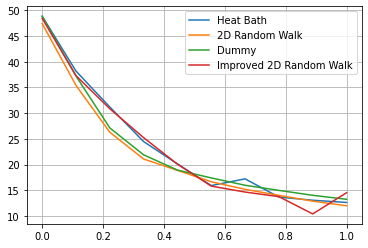

In [4]:
plot_series(np.stack(losses), x, names, 'plots/uni/uni_losses_diffeten_lambdas')

The best number of cities for $\lambda \in [0,1]$ for four base chains:

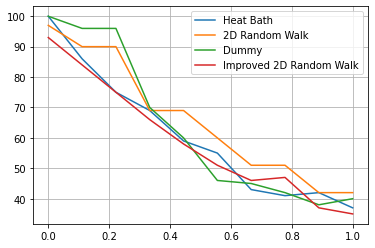

In [5]:
plot_series(np.stack(num_cities), x, names, 'plots/uni/uni_num_cities_diffeten_lambdas')

The number of cities in experiments where the objective function achieves the best value for $\lambda \in [0,1]$ for four base chains:

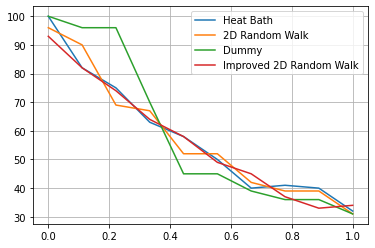

In [6]:
plot_series(np.stack(num_cities_in_max), x, names, 'plots/uni/uni_num_cities_in_max_diffeten_lambdas')

The first term of the objective function for $\lambda \in [0,1]$ for four base chains:

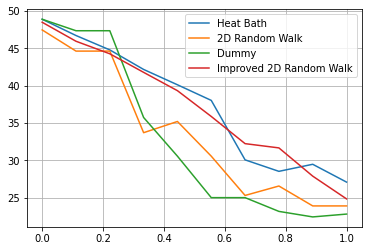

In [7]:
plot_series(np.stack(losses_v), x, names, 'plots/uni/uni_losses_v_diffeten_lambdas')

The second term for $\lambda \in [0,1]$ for four base chains:

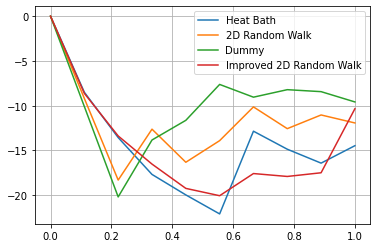

In [8]:
plot_series(np.stack(losses) - np.stack(losses_v), x, names, 'plots/uni/uni_regul_term_diffeten_lambdas')

The biggest rejection rate for $\lambda \in [0,1]$ for four base chains:

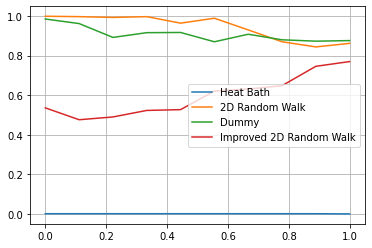

In [9]:
plot_series(np.stack(rej_rate), x, names, 'plots/uni/uni_rej_rate_diffeten_lambdas')

The rejection rate in experiments where the objective function achieves the best value for $\lambda \in [0,1]$ for four base chains:

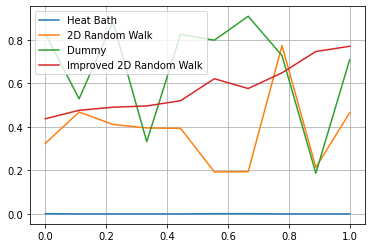

In [10]:
plot_series(np.stack(rej_rate_in_max), x, names, 'plots/uni/uni_rej_rate_in_max_diffeten_lambdas')

#### Now, let's depict evolution of our chains

Generating a uniform dataset:

In [39]:
data = G1() # generating uniform distribution

Defining the best parameters for the given $\lambda$:

In [40]:
lambda_num = 5
lambda_ = uni_chains_data[list(uni_chains_data.keys())[0]]['lambdas'][lambda_num]
betas, increases = get_best_params(uni_chains_data, lambda_num)

In [41]:
print(lambda_)

0.5555555555555556


In [42]:
print(betas)

{'HeatBath_Uni': 1.0, '2D_Uni': 0.1, 'Imp_Uni': 0.55, 'Dummy_Uni': 1.0}


In [43]:
print(increases)

{'HeatBath_Uni': 1.5, '2D_Uni': 1.0, 'Imp_Uni': 1.0, 'Dummy_Uni': 1.5}


Initializing the first state:

In [44]:
initial_state = init_state(data, lambda_)

Initializing Metropolis-Hastings algorithm:

In [45]:
heat_bath_chain = MetropolisHastings(HeatBathBaseChain(betas['HeatBath_Uni']), \
                                     betas['HeatBath_Uni'], initial_state, increases['HeatBath_Uni'], beta_iterations_increase=300)
random_walk_chain = MetropolisHastings(TwoDRandomWalk(), betas['2D_Uni'], initial_state, increases['2D_Uni'], beta_iterations_increase=300)
dummy_chain = MetropolisHastings(DummyBaseChain(), betas['Dummy_Uni'], initial_state, increases['Dummy_Uni'],  beta_iterations_increase=300)
improved_chain = MetropolisHastings(ImprovedBaseChain(), betas['Imp_Uni'], initial_state, increases['Imp_Uni'], beta_iterations_increase=300)

Running the chains for $2000$ iterations:

In [59]:
heat_bath_chain.perform_walk(2000) 



Solution: chosen cities[ 0  2  4  5  7 10 11 12 13 15 17 18 20 21 23 24 26 28 30 33 34 36 37 38
 39 41 46 47 48 49 52 54 55 56 57 64 69 74 76 78 80 83 86 89 90 91 93 95
 96 97 99] | cost: 16.6423508281046 | number of chosen cities: 51


16.6423508281046

In [60]:
random_walk_chain.perform_walk(2000) 



Solution: chosen cities[ 1  4  5  7  9 14 15 16 17 21 24 26 27 28 34 37 39 40 44 46 48 49 50 52
 55 56 57 58 61 63 69 72 75 76 80 89 91 92 95 96 97] | cost: 16.53054594321645 | number of chosen cities: 41


16.53054594321645

In [61]:
dummy_chain.perform_walk(2000) 



Solution: chosen cities[ 0  2  3  4  5  7  9 10 11 12 13 14 17 18 21 23 24 26 27 28 33 34 38 39
 41 42 46 47 49 52 53 55 56 57 64 69 71 74 76 78 79 80 83 86 89 91 92 95
 96] | cost: 16.98534473192806 | number of chosen cities: 49


16.98534473192806

In [62]:
improved_chain.perform_walk(2000) 



Solution: chosen cities[ 1  4  5  7  9 14 15 16 18 21 24 25 26 28 34 37 39 40 44 46 47 48 49 50
 52 55 56 57 58 61 63 69 72 75 76 80 83 89 91 92 93 95 96 97 98] | cost: 17.39809071933001 | number of chosen cities: 45


17.39809071933001

The plots of a number of chosen cities at each iteration:

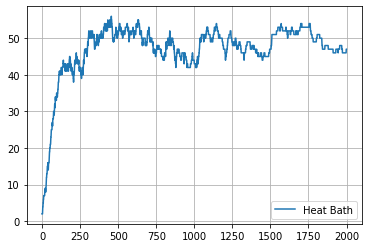

In [63]:
number_of_chosen_cities = np.array(heat_bath_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Heat Bath'], figname='plots/uni/uni_cities_heat_bath')

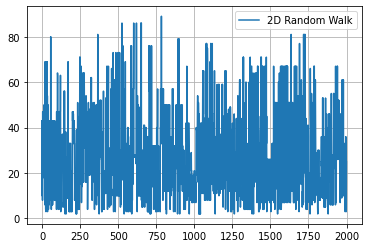

In [64]:
number_of_chosen_cities = np.array(random_walk_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['2D Random Walk'], figname='plots/uni/uni_cities_random_walk')

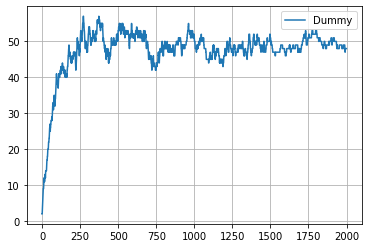

In [65]:
number_of_chosen_cities = np.array(dummy_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Dummy'], figname='plots/uni/uni_cities_dummy')

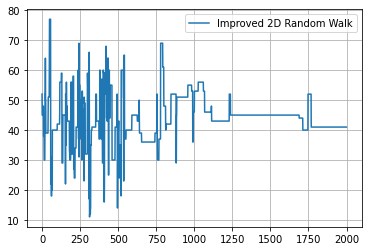

In [66]:
number_of_chosen_cities = np.array(improved_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Improved 2D Random Walk'], figname='plots/uni/uni_cities_improv')

The plots of values of the objective function at each iteration:

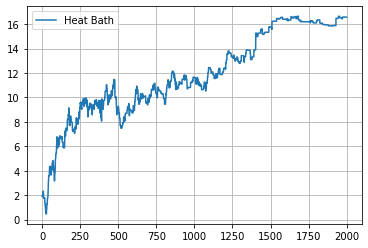

In [67]:
function_values = np.array(heat_bath_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Heat Bath'], figname='plots/uni/uni_costs_heat_bath')

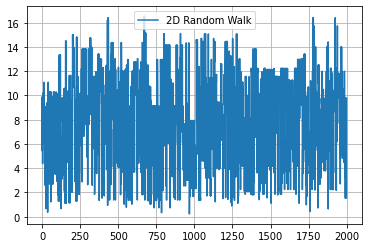

In [68]:
function_values = np.array(random_walk_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['2D Random Walk'], figname='plots/uni/uni_costs_random_walk')

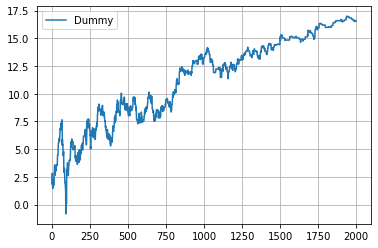

In [69]:
function_values = np.array(dummy_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Dummy'], figname='plots/uni/uni_costs_dummy')

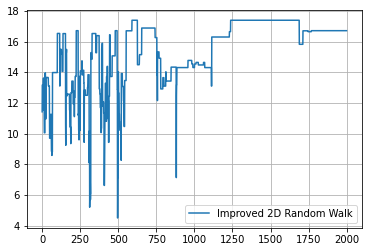

In [70]:
function_values = np.array(improved_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Improved 2D Random Walk'], figname='plots/uni/uni_costs_improv')

The best states for each chain:

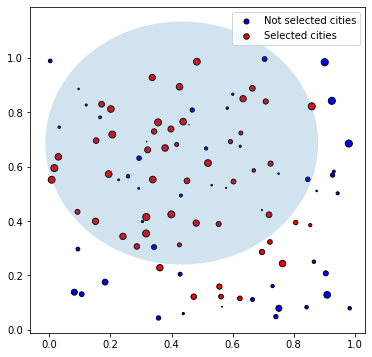

In [75]:
plot_state(heat_bath_chain.best_state, figname='plots/uni/uni_best_state_heat_bath')

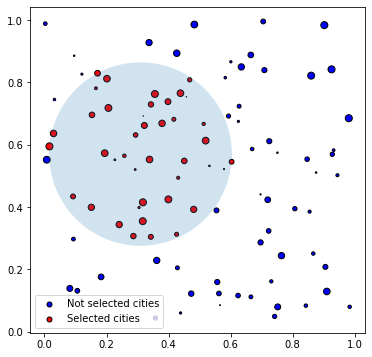

In [76]:
plot_state(random_walk_chain.best_state, figname='plots/uni/uni_best_state_random_walk')

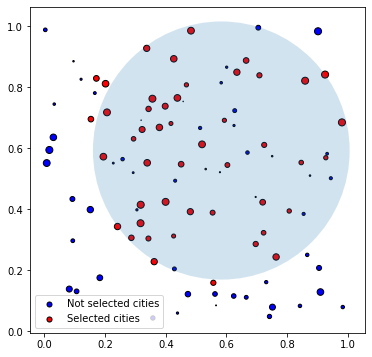

In [77]:
plot_state(dummy_chain.best_state, figname='plots/uni/uni_best_state_dummy')

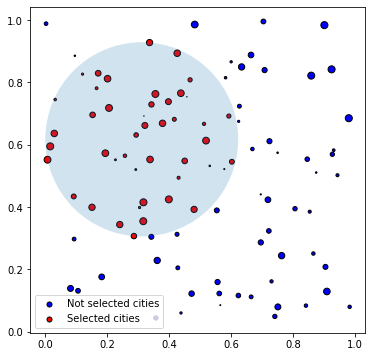

In [78]:
plot_state(improved_chain.best_state, figname='plots/uni/uni_best_state_improved')

The plots of empirical means for the heat bath base chain:

In [168]:
num_lambdas = 10
betas = []
increases = []
for i in range(num_lambdas):
    curr_betas, curr_increases = get_best_params(uni_chains_data, i)
    betas.append(curr_betas['HeatBath_Uni'])
    increases.append(curr_increases['HeatBath_Uni'])
mean_num_cities, mean_costs = heat_bath_chain.repeat_walks_for_fixed_parameters(HeatBathBaseChain(betas[0]), 
                                                                                  betas, 
                                                                                  initial_state,
                                                                                  iters = 600, 
                                                                                  beta_multiplicative_increase= increases,
                                                                                  beta_iterations_increase= 100, 
                                                                                  repetition_number= 10, 
                                                                                  lambda_lower_limit= 0, 
                                                                                  lambda_upper_limit= 1, 
                                                                                  number_of_lambdas= num_lambdas,
                                                                                  dataset_generator = G1)

10it [3:03:28, 1100.89s/it]


In [169]:
x = np.linspace(start=0, stop=1, num=num_lambdas).reshape((1, -1))

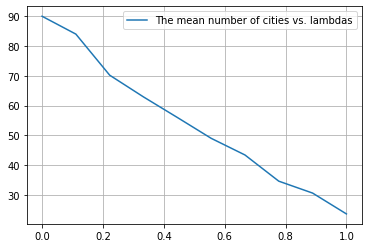

In [170]:
plot_series(np.array(list(mean_num_cities.values())).reshape((1,-1)), \
            x, ['The mean number of cities vs. lambdas'], 'plots/uni/uni_mean_num_cities')

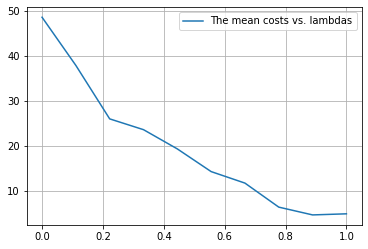

In [171]:
plot_series(np.array(list(mean_costs.values())).reshape((1,-1)), \
            x, ['The mean costs vs. lambdas'], 'plots/uni/uni_mean_costs')

# Gaussian distribution

First of all, we want to look ar a performance of different base chains using collected data as described above. For the sake of it, we plot different values with optimal $\beta$ and its increase factor for particular $\lambda$

In [3]:
names = ['Heat Bath', '2D Random Walk', 'Dummy', 'Improved 2D Random Walk']
losses, num_cities, num_cities_in_max, \
losses_v, rej_rate, rej_rate_in_max, x = get_experiments_data(gaus_chains_data)

The best values of the objective function for $\lambda \in [0,1]$ for four base chains:

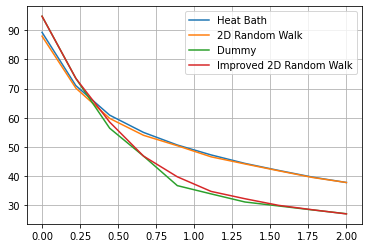

In [4]:
plot_series(np.stack(losses), x, names, 'plots/gaus/gaus_losses_diffeten_lambdas')

The best number of cities for $\lambda \in [0,1]$ for four base chains:

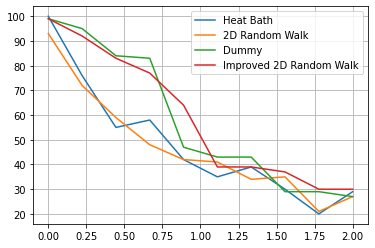

In [81]:
plot_series(np.stack(num_cities), x, names, 'plots/gaus/gaus_num_cities_diffeten_lambdas')

The number of cities in experiments where the objective function achieves the best value for $\lambda \in [0,1]$ for four base chains:

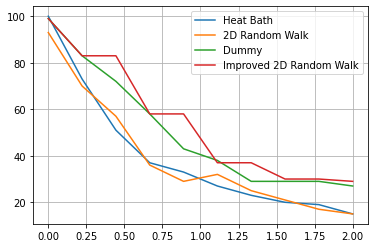

In [82]:
plot_series(np.stack(num_cities_in_max), x, names, 'plots/gaus/gaus_num_cities_in_max_diffeten_lambdas')

The first term of the objective function for $\lambda \in [0,1]$ for four base chains:

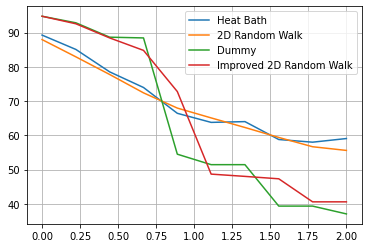

In [83]:
plot_series(np.stack(losses_v), x, names, 'plots/gaus/gaus_losses_v_diffeten_lambdas')

The second term for $\lambda \in [0,1]$ for four base chains:

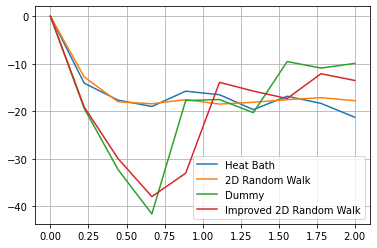

In [84]:
plot_series(np.stack(losses) - np.stack(losses_v), x, names, 'plots/gaus/gaus_regul_term_diffeten_lambdas')

The biggest rejection rate for $\lambda \in [0,1]$ for four base chains:

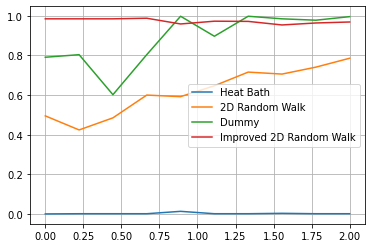

In [85]:
plot_series(np.stack(rej_rate), x, names, 'plots/gaus/gaus_rej_rate_diffeten_lambdas')

The rejection rate in experiments where the objective function achieves the best value for $\lambda \in [0,1]$ for four base chains:

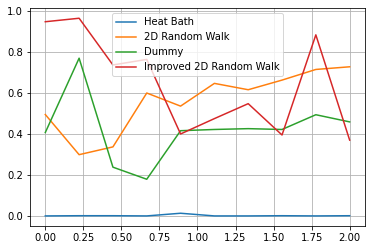

In [86]:
plot_series(np.stack(rej_rate_in_max), x, names, 'plots/gaus/gaus_rej_rate_in_max_diffeten_lambdas')

#### Now, let's depict evolution of our chains

Generating a uniform dataset:

In [5]:
data = G2() # generating gausform distribution

Defining the best parameters for the given $\lambda$:

In [47]:
lambda_num = 5
lambda_ = gaus_chains_data[list(gaus_chains_data.keys())[0]]['lambdas'][lambda_num]
betas, increases = get_best_params(gaus_chains_data, lambda_num)

In [48]:
print(lambda_)

1.1111111111111112


In [50]:
print(betas)

{'HeatBath_Gaus': 0.55, 'Dummy_Gaus': 1.0, '2D_Gaus': 0.1, 'Imp_Gaus': 0.1}


In [49]:
print(increases)

{'HeatBath_Gaus': 1.5, 'Dummy_Gaus': 1.25, '2D_Gaus': 1.0, 'Imp_Gaus': 1.0}


Initializing the first state:

In [23]:
initial_state = init_state(data, lambda_)

Initializing Metropolis-Hastings algorithm:

In [24]:
heat_bath_chain = MetropolisHastings(HeatBathBaseChain(betas['HeatBath_Gaus']), \
                                     betas['HeatBath_Gaus'], initial_state, increases['HeatBath_Gaus'], beta_iterations_increase=300)
random_walk_chain = MetropolisHastings(TwoDRandomWalk(), betas['2D_Gaus'], initial_state, increases['2D_Gaus'],beta_iterations_increase=300)
dummy_chain = MetropolisHastings(DummyBaseChain(), betas['Dummy_Gaus'], initial_state, increases['Dummy_Gaus'], beta_iterations_increase=300)
improved_chain = MetropolisHastings(ImprovedBaseChain(), betas['Imp_Gaus'], initial_state, increases['Imp_Gaus'], beta_iterations_increase=300)

Running the chains for $2000$ iterations:

In [25]:
heat_bath_chain.perform_walk(2000) 



Solution: chosen cities[ 3  9 10 17 28 30 31 38 44 52 64 66 69 72 74 78 79 82 84 87 92 94 96] | cost: 44.24897181480447 | number of chosen cities: 23


44.24897181480447

In [98]:
random_walk_chain.perform_walk(2000) 



Solution: chosen cities[ 0  2  4  9 12 16 17 20 22 26 29 30 32 33 38 41 53 54 58 60 64 65 68 73
 77 79 81 84 85 87 89 90 99] | cost: 33.54931319931701 | number of chosen cities: 33


33.54931319931701

In [99]:
dummy_chain.perform_walk(2000) 



Solution: chosen cities[ 2  3  9 10 11 12 28 30 31 38 42 44 52 64 66 68 72 74 77 78 79 82 84 85
 87 92 96] | cost: 45.360733333956695 | number of chosen cities: 27


45.360733333956695

In [100]:
improved_chain.perform_walk(2000) 



Solution: chosen cities[ 0  2  3  4  9 10 11 12 16 19 22 24 26 29 30 31 33 36 41 42 47 50 53 54
 58 60 64 65 69 71 74 78 79 82 84 86 87 89 94] | cost: 35.066020075595716 | number of chosen cities: 39


35.066020075595716

The plots of a number of chosen cities at each iteration:

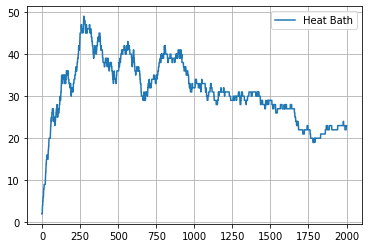

In [101]:
number_of_chosen_cities = np.array(heat_bath_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Heat Bath'], figname='plots/gaus/gaus_cities_heat_bath')

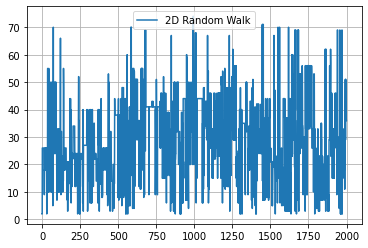

In [102]:
number_of_chosen_cities = np.array(random_walk_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['2D Random Walk'], figname='plots/gaus/gaus_cities_random_walk')

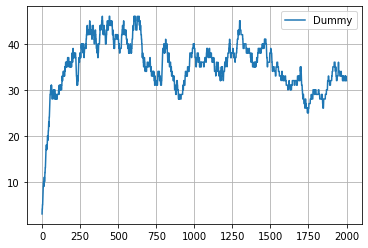

In [103]:
number_of_chosen_cities = np.array(dummy_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Dummy'], figname='plots/gaus/Gaus_cities_dummy')

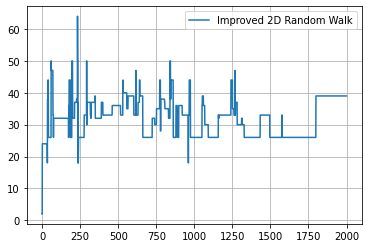

In [104]:
number_of_chosen_cities = np.array(improved_chain.number_of_chosen_cities).reshape((1,-1))
plot_series(number_of_chosen_cities, param_names=['Improved 2D Random Walk'], figname='plots/gaus/gaus_cities_improv')

The plots of values of the objective function at each iteration:

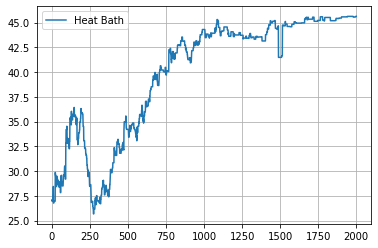

In [105]:
function_values = np.array(heat_bath_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Heat Bath'], figname='plots/gaus/gaus_costs_heat_bath')

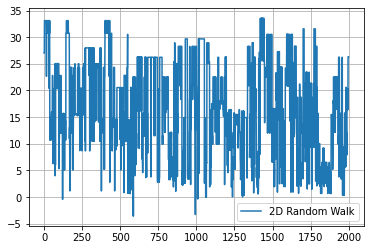

In [106]:
function_values = np.array(random_walk_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['2D Random Walk'], figname='plots/gaus/gaus_costs_random_walk')

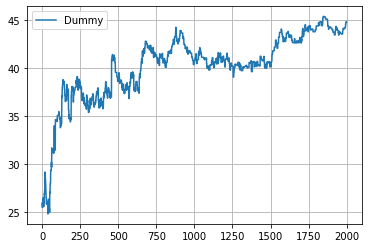

In [107]:
function_values = np.array(dummy_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Dummy'], figname='plots/gaus/gaus_costs_dummy')

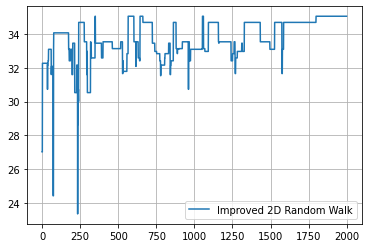

In [108]:
function_values = np.array(improved_chain.function_values).reshape((1,-1))
plot_series(function_values, param_names=['Improved 2D Random Walk'], figname='plots/gaus/gaus_costs_improv')

The best states for each chain:

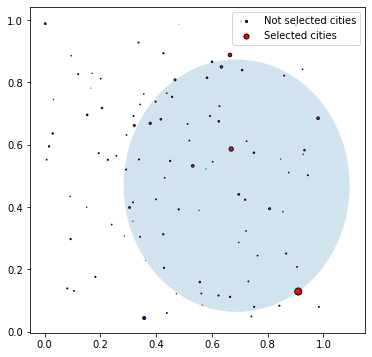

In [109]:
plot_state(heat_bath_chain.best_state, figname='plots/gaus/gaus_best_state_heat_bath')

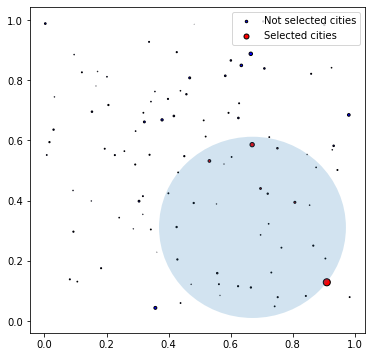

In [110]:
plot_state(random_walk_chain.best_state, figname='plots/gaus/gaus_best_state_random_walk')

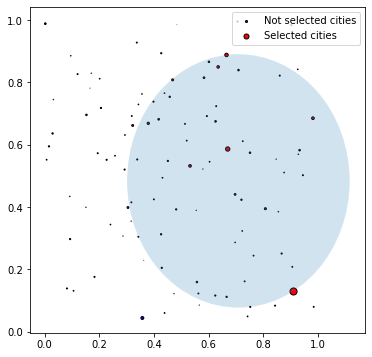

In [111]:
plot_state(dummy_chain.best_state, figname='plots/gaus/gaus_best_state_dummy')

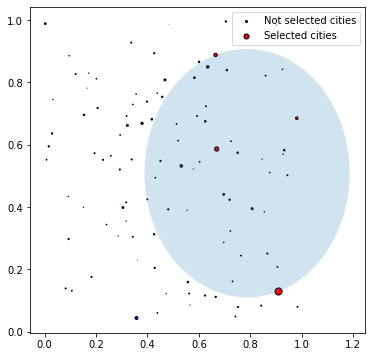

In [112]:
plot_state(improved_chain.best_state, figname='plots/gaus/gaus_best_state_improved')

The plots of empirical means for the heat bath base chain:

In [177]:
num_lambdas = 10
betas = []
increases = []
for i in range(num_lambdas):
    curr_betas, curr_increases = get_best_params(gaus_chains_data, i)
    betas.append(curr_betas['HeatBath_Gaus'])
    increases.append(curr_increases['HeatBath_Gaus'])
    
mean_num_cities1, mean_costs1 = \
heat_bath_chain.repeat_walks_for_fixed_parameters(HeatBathBaseChain(betas[0]), 
                                                  betas, 
                                                  initial_state,
                                                  iters = 600, 
                                                  beta_multiplicative_increase= increases,
                                                  beta_iterations_increase= 100, 
                                                  repetition_number= 10, 
                                                  lambda_lower_limit= 0, 
                                                  lambda_upper_limit= 2, 
                                                  number_of_lambdas= num_lambdas, dataset_generator = G2)

0it [00:00, ?it/s]src/MetropolisHastings.py:40: RuntimeWarning: overflow encountered in exp
  return np.exp(self.beta * state.cost)
src/MetropolisHastings.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return min(1, self.get_pi_for_ratio(j) * self.base_chain.matrix(j,i)/ ( self.get_pi_for_ratio(i) * self.base_chain.matrix(i,j)) + 10e-5)
src/MetropolisHastings.py:40: RuntimeWarning: overflow encountered in exp
  return np.exp(self.beta * state.cost)
src/MetropolisHastings.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return min(1, self.get_pi_for_ratio(j) * self.base_chain.matrix(j,i)/ ( self.get_pi_for_ratio(i) * self.base_chain.matrix(i,j)) + 10e-5)
1it [32:32, 1952.49s/it]src/MetropolisHastings.py:40: RuntimeWarning: overflow encountered in exp
  return np.exp(self.beta * state.cost)
src/MetropolisHastings.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return min(1, self.get_pi_for_ratio(j) * self.base_chain.matrix(j,

In [178]:
x = np.linspace(start=0, stop=2, num=num_lambdas).reshape((1, -1))

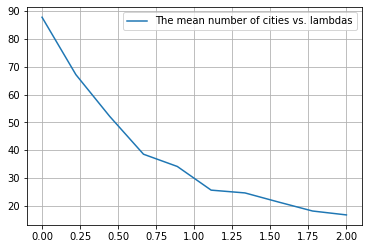

In [179]:
plot_series(np.array(list(mean_num_cities1.values())).reshape((1,-1)), \
            x, ['The mean number of cities vs. lambdas'], 'plots/gaus/gaus_mean_num_cities')

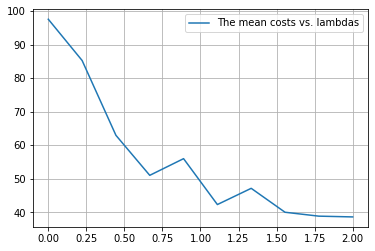

In [180]:
plot_series(np.array(list(mean_costs1.values())).reshape((1,-1)), \
            x, ['The mean costs vs. lambdas'], 'plots/gaus/gaus_mean_costs')